# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import unique , argmax

import tensorflow as tf
from tensorflow import keras

# Load the MNIST dataset from the keras api by tenserflow

In [2]:
mnist = tf.keras.datasets.mnist

# Divide the data into train and test data


In [3]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [6]:
print(x_test)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


# Reshaping the input data

In [7]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))
print(x_train.shape)
print(x_test.shape)
print(x_train.dtype)
print(x_test.dtype)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
uint8
uint8


# Normalizing the pixel values

In [8]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0
print(x_train.dtype)
print(x_test.dtype)

float32
float32


# Visulaizing subset image in MNIST dataset with lable

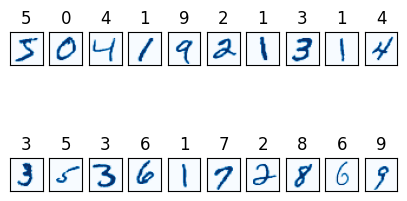

In [9]:
fig = plt.figure(figsize=(5, 3))
for i in range(20):
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='Blues')
    ax.set_title(y_train[i])

plt.show()


# Showing the of single image

In [10]:
img_shape=x_train.shape[1:]
img_shape

(28, 28, 1)

# Reading handwritten digits and Building neural network

In [11]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Making prediction on model

In [13]:
prediction=model(x_train[:1]).numpy()
prediction

array([[-1.2216634 ,  0.95053625, -0.38321152,  0.13652627, -0.1775499 ,
         0.3057984 , -0.2208238 ,  0.6830159 , -0.4526914 ,  0.14999864]],
      dtype=float32)

# Using Softmax() function for predection

In [14]:
tf.nn.softmax(prediction).numpy()

array([[0.02566464, 0.22527319, 0.05935677, 0.09981354, 0.07291014,
        0.1182234 , 0.06982233, 0.17239588, 0.05537267, 0.10116737]],
      dtype=float32)

In [15]:
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1],prediction).numpy()
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

# Model Fitting


In [16]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3032 - accuracy: 0.9114
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1444 - accuracy: 0.9569
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1092 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0884 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0771 - accuracy: 0.9757


# Evaluating the model

In [17]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.0747 - accuracy: 0.9778 - 1s/epoch - 4ms/step


[0.07466255873441696, 0.9778000116348267]

# Create new sequential model using trained and Softmax layer

In [18]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[5.1995311e-08, 1.0069491e-08, 2.0351331e-06, 2.9080866e-05,
        6.1000788e-11, 1.8289779e-08, 1.6559259e-14, 9.9996531e-01,
        1.0019148e-07, 3.3774775e-06],
       [5.3249727e-10, 2.3971868e-04, 9.9975187e-01, 6.7323731e-06,
        3.4342490e-16, 3.0119842e-09, 6.8363544e-11, 2.7169274e-12,
        1.6535832e-06, 1.5805865e-11],
       [2.4514037e-08, 9.9976474e-01, 8.2573461e-06, 9.7381212e-07,
        5.0254948e-06, 4.7914455e-07, 5.6175090e-06, 1.4685837e-04,
        6.7987006e-05, 6.6029529e-08],
       [9.9988723e-01, 2.2281564e-10, 7.8934885e-05, 2.9759585e-08,
        4.3492818e-07, 1.6545944e-06, 1.1495768e-05, 3.9811375e-06,
        4.6980489e-08, 1.6088647e-05],
       [1.5139339e-05, 1.7678195e-08, 1.9225341e-05, 4.0919348e-09,
        9.9773204e-01, 2.1737202e-07, 1.0082042e-05, 9.0913338e-05,
        6.8034535e-07, 2.1317624e-03]], dtype=float32)>

# Display a grayscale image

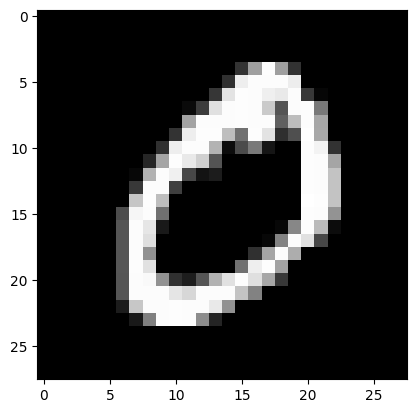

In [19]:
img=x_train[1]
plt.imshow(np.squeeze(img),cmap='gray')
plt.show()

# Predicting the result

In [20]:
img=img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
p=model.predict([img])
print("Predected image is :{}".format(argmax(p)))

1/1 [==============================] - 0s 225ms/step
Predected image is :0
